Input image shape is  (28, 28, 3)


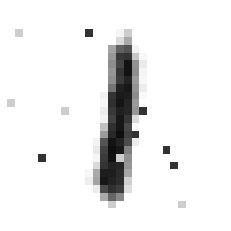

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import imshow
img_path='/Users/liang/Downloads/500_each_EMNIST-based-Roman/train/i/1_cap_1.png'
img=plt.imread(img_path)
print ('Input image shape is ',img.shape)
plt.axis('off')
imshow(img)

In [11]:
import os
import pandas as pd
def print_in_color(txt_msg,fore_tupple,back_tupple,):
    #prints the text_msg in the foreground color specified by fore_tupple with the background specified by back_tupple 
    #text_msg is the text, fore_tupple is foregroud color tupple (r,g,b), back_tupple is background tupple (r,g,b)
    rf,gf,bf=fore_tupple
    rb,gb,bb=back_tupple
    msg='{0}' + txt_msg
    mat='\33[38;2;' + str(rf) +';' + str(gf) + ';' + str(bf) + ';48;2;' + str(rb) + ';' +str(gb) + ';' + str(bb) +'m' 
    print(msg .format(mat), flush=True)
    print('\33[0m', flush=True) # returns default print color to back to black
    return
# -----------------------------------------------------
def preprocess (sdir):
    categories=['train', 'test', 'val']
    for category in categories:
        catpath=os.path.join(sdir, category)
        filepaths=[]
        labels=[]    
        classlist=os.listdir(catpath)
        for klass in classlist:
            classpath=os.path.join(catpath,klass)
            flist=os.listdir(classpath)
            for f in flist:
                fpath=os.path.join(classpath,f)
                filepaths.append(fpath)
                labels.append(klass)
        Fseries=pd.Series(filepaths, name='filepaths')
        Lseries=pd.Series(labels, name='labels')
        if category == 'train':
            train_df=pd.concat([Fseries, Lseries], axis=1)            
        elif category =='test':
            test_df=pd.concat([Fseries, Lseries], axis=1) 
        else:
            valid_df= pd.concat([Fseries, Lseries], axis=1)     
    print('train_df length: ', len(train_df), '  test_df length: ',len(test_df), '  valid_df length: ', len(valid_df))
     # check that each dataframe has the same number of classes to prevent model.fit errors
    trcount=len(train_df['labels'].unique())
    tecount=len(test_df['labels'].unique())
    vcount=len(valid_df['labels'].unique())
    if trcount < tecount :         
        msg='** WARNING ** number of classes in training set is less than the number of classes in test set'
        print_in_color(msg, (255,0,0), (55,65,80))
        msg='This will throw an error in either model.evaluate or model.predict'
        print_in_color(msg, (255,0,0), (55,65,80))
    if trcount != vcount:
        msg='** WARNING ** number of classes in training set not equal to number of classes in validation set' 
        print_in_color(msg, (255,0,0), (55,65,80))
        msg=' this will throw an error in model.fit'
        print_in_color(msg, (255,0,0), (55,65,80))
        print ('train df class count: ', trcount, 'test df class count: ', tecount, ' valid df class count: ', vcount) 
        ans=input('Enter C to continue execution or H to halt execution')
        if ans =='H' or ans == 'h':
            print_in_color('Halting Execution', (255,0,0), (55,65,80))
            import sys
            sys.exit('program halted by user')
    msg='Below is image count per class to evaluate train_df balance'
    print_in_color(msg, (0,255,255),(55,65,80))
    print(list(train_df['labels'].value_counts()))
    return train_df, test_df, valid_df

In [12]:
# sdir='/Users/liang/Downloads/500_each_EMNIST-based-Roman'
sdir='/Users/liang/Downloads/500_each_EMNIST-based-Roman'
train_df, test_df, valid_df= preprocess(sdir)


NotADirectoryError: [Errno 20] Not a directory: '/Users/liang/Downloads/500_each_EMNIST-based-Roman/train/.DS_Store'

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
working_dir = r'./'
img_size=(40,40)
channels=3
batch_size=30
img_shape=(img_size[0], img_size[1], channels)
length=len(test_df)
test_batch_size=sorted([int(length/n) for n in range(1,length+1) if length % n ==0 and length/n<=80],reverse=True)[0]  
test_steps=int(length/test_batch_size)
print ( 'test batch size: ' ,test_batch_size, '  test steps: ', test_steps)
def scalar(img):    
    return img  # EfficientNet expects pixelsin range 0 to 255 so no scaling is required
trgen=ImageDataGenerator(preprocessing_function=scalar, horizontal_flip=True)
tvgen=ImageDataGenerator(preprocessing_function=scalar)
msg='                                                                for the train generator'
print(msg, '\r', end='') 
train_gen=trgen.flow_from_dataframe( train_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=True, batch_size=batch_size)
msg='                                                               for the test generator'
print(msg, '\r', end='') 
test_gen=tvgen.flow_from_dataframe( test_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=False, batch_size=test_batch_size)
msg='                                                               for the validation generator'
print(msg, '\r', end='')
valid_gen=tvgen.flow_from_dataframe( valid_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=True, batch_size=batch_size)
classes=list(train_gen.class_indices.keys())
class_count=len(classes)
train_steps=int(np.ceil(len(train_gen.labels)/batch_size))
labels=test_gen.labels

ModuleNotFoundError: No module named 'tensorflow'

In [22]:
import os 
DIR = '/Users/liang/Downloads/Raw Handwritten Roman Numerals Dataset/train/vi' #要統計的資料夾
print (len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

232


In [26]:
#!/usr/bin/python
# -*- coding: UTF-8 -*-
import pandas as pd
import os
import imageio
# 打开文件
path = "/Users/liang/Downloads/Raw Handwritten Roman Numerals Dataset/train"
dirs = os.listdir( path )
dirs.remove('.DS_Store')
print(dirs)  # 输出所有子文件和文件夹
abc=pd.DataFrame()
count=0
for file in dirs:
   pic_dir=os.path.join(path,file)  #images中子文件夹的路径
   for i in os.listdir(pic_dir):
      image_dir=os.path.join(pic_dir,i)  #images中每个子文件夹中图片的路径
      img1 = imageio.imread(image_dir)  # 读取images中每个子文件夹中的图片
      abc=np.append(abc,img1)
      count+=1
      # print(image_dir)#输出图片的路径
      # print(img1)#输出图片
print(count)#图片个数
abc

['vi', 'ii', 'i', 'vii', 'viii', 'iv', 'ix', 'v', 'x', 'iii']


/var/folders/bt/lzds7c0956d278lsqrjn3ql00000gn/T/ipykernel_4913/1823670490.py:17: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img1 = imageio.imread(image_dir)  # 读取images中每个子文件夹中的图片


2321


array([173., 175., 172., ..., 211., 216., 210.])

In [27]:
from scipy.io import loadmat
from sklearn.datasets import fetch_openml
# data_dir = '../Data/'
# X,y=fetch_openml('mnist_748,return_X_y')
# D = loadmat('/Users/liang/Downloads/Letters_train.mat') 
# D.keys()
X = abc['X'] # images
y = abc['y'] # labels: single output in 0~9
plt.figure(figsize = (9,6))
# prepare and diaplay a montage of digit images n,m=20,30 #Anxmmontage(totalmnimages)
n,m=20,30
sz = np.sqrt(X.shape[1]).astype('int') # image size sz x sz M = np.zeros((m*sz, n*sz)) # montage image
M=np.zeros((m*sz,n*sz))
A = np.array(X)[:m*n,:] # show the first nm images
# Arrange images to form a montage
for i in range(m) :
    for j in range(n) :
        M[i*sz: (i+1)*sz, j*sz:(j+1)*sz] = \
            A[i*n+j,:].reshape(sz, sz)

plt.imshow(M.T, cmap = plt.cm.gray_r, \
        interpolation = 'nearest')
plt.xticks([])
plt.yticks([])
plt.title('The Montage of handwriting digits')
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices